# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 11.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 13.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 21.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 463 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [4]:
client = MongoClient(mongod_connect)
db = client.gp10 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [5]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [6]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#,locations = locations)   #Use either track or locations

1326994140136042496
1326994140190662657
1326994140429570048
1326994140387831810
1326994140417159174
1326994139808935937
1326994140698066949
1326994140509433856
1326994140664451072
1326994140693995525
1326994140681412618
1326994140719058944
1326994140945649664
1326994140907917313
1326994141021151238
1326994140995973123
1326994141163761664
1326994141075525632
1326994141075615745
1326994141167968261
1326994141222293504
1326994141327228930
1326994141390233600
1326994141335707650
1326994141436203009
1326994141654339584
1326994141654495233
1326994141570600966
1326994141797085190
1326994141960679424
1326994142040383491
1326994142031966210
1326994142170411020
1326994142245883904
1326994142296207361
1326994142409478144
1326994142422048768
1326994142505938949
1326994142476595200
1326994142438719488
1326994142426173440
1326994142493208576
1326994142438825984
1326994142505922560
1326994142740746240
1326994142614990849
1326994142631776258
1326994142845489153
1326994142732427265
1326994142812106753


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [10]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 21:04:52 +0000 2020'
'Thu Nov 12 21:04:50 +0000 2020'
'Thu Nov 12 21:04:48 +0000 2020'
'Thu Nov 12 21:04:48 +0000 2020'
'Thu Nov 12 21:04:37 +0000 2020'
'Thu Nov 12 21:04:31 +0000 2020'
'Thu Nov 12 21:04:14 +0000 2020'
'Thu Nov 12 21:04:06 +0000 2020'
'Thu Nov 12 21:03:46 +0000 2020'
'Thu Nov 12 21:03:34 +0000 2020'
'Thu Nov 12 21:03:26 +0000 2020'
'Thu Nov 12 21:03:08 +0000 2020'
'Thu Nov 12 21:02:59 +0000 2020'
'Thu Nov 12 21:02:58 +0000 2020'
'Thu Nov 12 21:02:19 +0000 2020'
'Thu Nov 12 21:02:14 +0000 2020'
'Thu Nov 12 21:02:09 +0000 2020'
'Thu Nov 12 21:02:01 +0000 2020'
'Thu Nov 12 21:01:59 +0000 2020'
'Thu Nov 12 21:01:18 +0000 2020'
'Thu Nov 12 21:01:12 +0000 2020'
'Thu Nov 12 21:01:02 +0000 2020'
'Thu Nov 12 21:01:01 +0000 2020'
'Thu Nov 12 21:00:43 +0000 2020'
'Thu Nov 12 21:00:41 +0000 2020'
'Thu Nov 12 21:00:27 +0000 2020'
'Thu Nov 12 21:00:11 +0000 2020'
'Thu Nov 12 21:00:07 +0000 2020'
'Thu Nov 12 20:59:56 +0000 2020'
'Thu Nov 12 20:59:46 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 20:57:29 +0000 2020'
'Thu Nov 12 20:57:10 +0000 2020'
'Thu Nov 12 20:56:48 +0000 2020'
'Thu Nov 12 20:56:34 +0000 2020'
'Thu Nov 12 20:56:22 +0000 2020'
'Thu Nov 12 20:56:22 +0000 2020'
'Thu Nov 12 20:56:19 +0000 2020'
'Thu Nov 12 20:56:07 +0000 2020'
'Thu Nov 12 20:56:04 +0000 2020'
'Thu Nov 12 20:56:02 +0000 2020'
'Thu Nov 12 20:55:54 +0000 2020'
'Thu Nov 12 20:55:46 +0000 2020'
'Thu Nov 12 20:55:32 +0000 2020'
'Thu Nov 12 20:55:31 +0000 2020'
'Thu Nov 12 20:55:27 +0000 2020'
'Thu Nov 12 20:55:17 +0000 2020'
'Thu Nov 12 20:55:16 +0000 2020'
'Thu Nov 12 20:55:11 +0000 2020'
'Thu Nov 12 20:55:07 +0000 2020'
'Thu Nov 12 20:55:03 +0000 2020'
'Thu Nov 12 20:54:43 +0000 2020'
'Thu Nov 12 20:54:20 +0000 2020'
'Thu Nov 12 20:54:09 +0000 2020'
'Thu Nov 12 20:53:48 +0000 2020'
'Thu Nov 12 20:53:45 +0000 2020'
'Thu Nov 12 20:53:39 +0000 2020'
'Thu Nov 12 20:53:32 +0000 2020'
'Thu Nov 12 20:53:15 +0000 2020'
'Thu Nov 12 20:53:11 +0000 2020'
'Thu Nov 12 20:53:05 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:24:20 +0000 2020'
'Thu Nov 12 20:24:14 +0000 2020'
'Thu Nov 12 20:24:05 +0000 2020'
'Thu Nov 12 20:24:01 +0000 2020'
'Thu Nov 12 20:24:01 +0000 2020'
'Thu Nov 12 20:23:58 +0000 2020'
'Thu Nov 12 20:23:56 +0000 2020'
'Thu Nov 12 20:23:33 +0000 2020'
'Thu Nov 12 20:23:32 +0000 2020'
'Thu Nov 12 20:23:25 +0000 2020'
'Thu Nov 12 20:23:22 +0000 2020'
'Thu Nov 12 20:23:06 +0000 2020'
'Thu Nov 12 20:23:06 +0000 2020'
'Thu Nov 12 20:23:01 +0000 2020'
'Thu Nov 12 20:22:58 +0000 2020'
'Thu Nov 12 20:22:58 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:53 +0000 2020'
'Thu Nov 12 20:22:51 +0000 2020'
'Thu Nov 12 20:22:44 +0000 2020'
'Thu Nov 12 20:22:41 +0000 2020'
'Thu Nov 12 20:22:40 +0000 2020'
'Thu Nov 12 20:22:38 +0000 2020'
'Thu Nov 12 20:22:32 +0000 2020'
'Thu Nov 12 20:22:24 +0000 2020'
'Thu Nov 12 20:22:21 +0000 2020'
'Thu Nov 12 20:22:20 +0000 2020'
'Thu Nov 12 20:22:20 +0000 2020'
'Thu Nov 12 20:22:19 +0000 2020'
'Thu Nov 12 20:22:12 +0000 2020'
'Thu Nov 1

'Thu Nov 12 17:41:49 +0000 2020'
'Thu Nov 12 17:41:35 +0000 2020'
'Thu Nov 12 17:41:17 +0000 2020'
'Thu Nov 12 17:40:34 +0000 2020'
'Thu Nov 12 17:40:25 +0000 2020'
'Thu Nov 12 17:40:07 +0000 2020'
'Thu Nov 12 17:39:54 +0000 2020'
'Thu Nov 12 17:39:30 +0000 2020'
'Thu Nov 12 17:39:22 +0000 2020'
'Thu Nov 12 17:39:17 +0000 2020'
'Thu Nov 12 17:39:07 +0000 2020'
'Thu Nov 12 17:37:25 +0000 2020'
'Thu Nov 12 17:33:49 +0000 2020'
'Thu Nov 12 17:33:45 +0000 2020'
'Thu Nov 12 17:31:50 +0000 2020'
'Thu Nov 12 17:30:20 +0000 2020'
'Thu Nov 12 17:29:50 +0000 2020'
'Thu Nov 12 17:27:39 +0000 2020'
'Thu Nov 12 17:26:00 +0000 2020'
'Thu Nov 12 17:25:51 +0000 2020'
'Thu Nov 12 17:24:19 +0000 2020'
'Thu Nov 12 17:23:49 +0000 2020'
'Thu Nov 12 17:22:19 +0000 2020'
'Thu Nov 12 17:19:05 +0000 2020'
'Thu Nov 12 17:17:45 +0000 2020'
'Thu Nov 12 17:17:45 +0000 2020'
'Thu Nov 12 17:17:01 +0000 2020'
'Thu Nov 12 17:15:25 +0000 2020'
'Thu Nov 12 17:11:20 +0000 2020'
'Thu Nov 12 17:09:05 +0000 2020'
'Thu Nov 1

'Thu Nov 12 09:42:14 +0000 2020'
'Thu Nov 12 09:34:42 +0000 2020'
'Thu Nov 12 09:30:33 +0000 2020'
'Thu Nov 12 09:22:31 +0000 2020'
'Thu Nov 12 09:20:43 +0000 2020'
'Thu Nov 12 09:20:08 +0000 2020'
'Thu Nov 12 09:16:11 +0000 2020'
'Thu Nov 12 09:14:07 +0000 2020'
'Thu Nov 12 09:05:25 +0000 2020'
'Thu Nov 12 09:03:19 +0000 2020'
'Thu Nov 12 09:01:35 +0000 2020'
'Thu Nov 12 08:58:22 +0000 2020'
'Thu Nov 12 08:48:31 +0000 2020'
'Thu Nov 12 08:34:08 +0000 2020'
'Thu Nov 12 08:31:12 +0000 2020'
'Thu Nov 12 08:29:58 +0000 2020'
'Thu Nov 12 08:25:55 +0000 2020'
'Thu Nov 12 08:25:54 +0000 2020'
'Thu Nov 12 08:02:15 +0000 2020'
'Thu Nov 12 08:02:01 +0000 2020'
'Thu Nov 12 08:00:05 +0000 2020'
'Thu Nov 12 07:57:14 +0000 2020'
'Thu Nov 12 07:56:40 +0000 2020'
'Thu Nov 12 07:56:06 +0000 2020'
'Thu Nov 12 07:51:45 +0000 2020'
'Thu Nov 12 07:38:46 +0000 2020'
'Thu Nov 12 07:35:40 +0000 2020'
'Thu Nov 12 07:33:54 +0000 2020'
'Thu Nov 12 07:25:59 +0000 2020'
'Thu Nov 12 07:24:19 +0000 2020'
'Thu Nov 1

'Thu Nov 12 00:19:42 +0000 2020'
'Thu Nov 12 00:19:38 +0000 2020'
'Thu Nov 12 00:18:55 +0000 2020'
'Thu Nov 12 00:18:14 +0000 2020'
'Thu Nov 12 00:17:44 +0000 2020'
'Thu Nov 12 00:17:20 +0000 2020'
'Thu Nov 12 00:17:05 +0000 2020'
'Thu Nov 12 00:17:03 +0000 2020'
'Thu Nov 12 00:15:01 +0000 2020'
'Thu Nov 12 00:14:01 +0000 2020'
'Thu Nov 12 00:10:38 +0000 2020'
'Thu Nov 12 00:10:12 +0000 2020'
'Thu Nov 12 00:09:48 +0000 2020'
'Thu Nov 12 00:09:05 +0000 2020'
'Thu Nov 12 00:08:29 +0000 2020'
'Thu Nov 12 00:04:55 +0000 2020'
'Thu Nov 12 00:02:22 +0000 2020'
'Thu Nov 12 00:01:48 +0000 2020'
'Thu Nov 12 00:01:45 +0000 2020'
'Thu Nov 12 00:00:53 +0000 2020'
'Thu Nov 12 00:00:16 +0000 2020'
'Thu Nov 12 00:00:12 +0000 2020'
'Thu Nov 12 00:00:06 +0000 2020'
'Wed Nov 11 23:56:59 +0000 2020'
'Wed Nov 11 23:56:23 +0000 2020'
'Wed Nov 11 23:56:17 +0000 2020'
'Wed Nov 11 23:56:14 +0000 2020'
'Wed Nov 11 23:56:06 +0000 2020'
'Wed Nov 11 23:56:02 +0000 2020'
'Wed Nov 11 23:55:56 +0000 2020'
'Wed Nov 1

'Wed Nov 11 19:15:11 +0000 2020'
'Wed Nov 11 19:14:58 +0000 2020'
'Wed Nov 11 19:14:46 +0000 2020'
'Wed Nov 11 19:14:22 +0000 2020'
'Wed Nov 11 19:13:53 +0000 2020'
'Wed Nov 11 19:13:46 +0000 2020'
'Wed Nov 11 19:13:30 +0000 2020'
'Wed Nov 11 19:13:25 +0000 2020'
'Wed Nov 11 19:13:03 +0000 2020'
'Wed Nov 11 19:11:54 +0000 2020'
'Wed Nov 11 19:11:20 +0000 2020'
'Wed Nov 11 19:11:17 +0000 2020'
'Wed Nov 11 19:11:15 +0000 2020'
'Wed Nov 11 19:10:49 +0000 2020'
'Wed Nov 11 19:10:06 +0000 2020'
'Wed Nov 11 19:09:51 +0000 2020'
'Wed Nov 11 19:09:43 +0000 2020'
'Wed Nov 11 19:09:09 +0000 2020'
'Wed Nov 11 19:08:14 +0000 2020'
'Wed Nov 11 19:08:00 +0000 2020'
'Wed Nov 11 19:06:12 +0000 2020'
'Wed Nov 11 19:03:30 +0000 2020'
'Wed Nov 11 19:03:29 +0000 2020'
'Wed Nov 11 19:00:47 +0000 2020'
'Wed Nov 11 19:00:18 +0000 2020'
'Wed Nov 11 18:55:44 +0000 2020'
'Wed Nov 11 18:55:16 +0000 2020'
'Wed Nov 11 18:54:21 +0000 2020'
'Wed Nov 11 18:53:17 +0000 2020'
'Wed Nov 11 18:53:16 +0000 2020'
'Wed Nov 1

'Wed Nov 11 17:46:23 +0000 2020'
'Wed Nov 11 17:46:17 +0000 2020'
'Wed Nov 11 17:45:31 +0000 2020'
'Wed Nov 11 17:45:19 +0000 2020'
'Wed Nov 11 17:44:51 +0000 2020'
'Wed Nov 11 17:44:23 +0000 2020'
'Wed Nov 11 17:43:45 +0000 2020'
'Wed Nov 11 17:42:34 +0000 2020'
'Wed Nov 11 17:42:32 +0000 2020'
'Wed Nov 11 17:41:36 +0000 2020'
'Wed Nov 11 17:40:28 +0000 2020'
'Wed Nov 11 17:40:23 +0000 2020'
'Wed Nov 11 17:40:23 +0000 2020'
'Wed Nov 11 17:40:21 +0000 2020'
'Wed Nov 11 17:37:16 +0000 2020'
'Wed Nov 11 17:36:52 +0000 2020'
'Wed Nov 11 17:36:47 +0000 2020'
'Wed Nov 11 17:36:38 +0000 2020'
'Wed Nov 11 17:34:59 +0000 2020'
'Wed Nov 11 17:34:05 +0000 2020'
'Wed Nov 11 17:33:24 +0000 2020'
'Wed Nov 11 17:32:09 +0000 2020'
'Wed Nov 11 17:31:19 +0000 2020'
'Wed Nov 11 17:31:05 +0000 2020'
'Wed Nov 11 17:31:04 +0000 2020'
'Wed Nov 11 17:31:04 +0000 2020'
'Wed Nov 11 17:31:00 +0000 2020'
'Wed Nov 11 17:30:52 +0000 2020'
'Wed Nov 11 17:30:24 +0000 2020'
'Wed Nov 11 17:30:00 +0000 2020'
'Wed Nov 1

'Wed Nov 11 15:19:07 +0000 2020'
'Wed Nov 11 15:19:06 +0000 2020'
'Wed Nov 11 15:18:16 +0000 2020'
'Wed Nov 11 15:17:58 +0000 2020'
'Wed Nov 11 15:17:46 +0000 2020'
'Wed Nov 11 15:17:18 +0000 2020'
'Wed Nov 11 15:17:14 +0000 2020'
'Wed Nov 11 15:17:07 +0000 2020'
'Wed Nov 11 15:16:43 +0000 2020'
'Wed Nov 11 15:16:35 +0000 2020'
'Wed Nov 11 15:16:17 +0000 2020'
'Wed Nov 11 15:15:51 +0000 2020'
'Wed Nov 11 15:15:38 +0000 2020'
'Wed Nov 11 15:15:03 +0000 2020'
'Wed Nov 11 15:14:34 +0000 2020'
'Wed Nov 11 15:14:23 +0000 2020'
'Wed Nov 11 15:13:49 +0000 2020'
'Wed Nov 11 15:13:46 +0000 2020'
'Wed Nov 11 15:12:26 +0000 2020'
'Wed Nov 11 15:12:04 +0000 2020'
'Wed Nov 11 15:11:50 +0000 2020'
'Wed Nov 11 15:11:35 +0000 2020'
'Wed Nov 11 15:11:26 +0000 2020'
'Wed Nov 11 15:11:12 +0000 2020'
'Wed Nov 11 15:10:42 +0000 2020'
'Wed Nov 11 15:10:11 +0000 2020'
'Wed Nov 11 15:09:59 +0000 2020'
'Wed Nov 11 15:09:49 +0000 2020'
'Wed Nov 11 15:09:46 +0000 2020'
'Wed Nov 11 15:09:23 +0000 2020'
'Wed Nov 1

'Wed Nov 11 13:28:32 +0000 2020'
'Wed Nov 11 13:26:38 +0000 2020'
'Wed Nov 11 13:26:12 +0000 2020'
'Wed Nov 11 13:24:36 +0000 2020'
'Wed Nov 11 13:23:24 +0000 2020'
'Wed Nov 11 13:22:31 +0000 2020'
'Wed Nov 11 13:22:15 +0000 2020'
'Wed Nov 11 13:22:03 +0000 2020'
'Wed Nov 11 13:20:00 +0000 2020'
'Wed Nov 11 13:18:55 +0000 2020'
'Wed Nov 11 13:17:00 +0000 2020'
'Wed Nov 11 13:16:24 +0000 2020'
'Wed Nov 11 13:10:06 +0000 2020'
'Wed Nov 11 13:10:00 +0000 2020'
'Wed Nov 11 13:08:55 +0000 2020'
'Wed Nov 11 13:04:59 +0000 2020'
'Wed Nov 11 13:01:46 +0000 2020'
'Wed Nov 11 13:01:36 +0000 2020'
'Wed Nov 11 13:01:26 +0000 2020'
'Wed Nov 11 13:00:28 +0000 2020'
'Wed Nov 11 13:00:24 +0000 2020'
'Wed Nov 11 12:58:22 +0000 2020'
'Wed Nov 11 12:56:54 +0000 2020'
'Wed Nov 11 12:56:45 +0000 2020'
'Wed Nov 11 12:56:44 +0000 2020'
'Wed Nov 11 12:55:28 +0000 2020'
'Wed Nov 11 12:55:07 +0000 2020'
'Wed Nov 11 12:54:38 +0000 2020'
'Wed Nov 11 12:54:37 +0000 2020'
'Wed Nov 11 12:54:18 +0000 2020'
'Wed Nov 1

'Wed Nov 11 04:38:23 +0000 2020'
'Wed Nov 11 04:37:17 +0000 2020'
'Wed Nov 11 04:34:47 +0000 2020'
'Wed Nov 11 04:31:10 +0000 2020'
'Wed Nov 11 04:30:16 +0000 2020'
'Wed Nov 11 04:30:02 +0000 2020'
'Wed Nov 11 04:26:23 +0000 2020'
'Wed Nov 11 04:25:23 +0000 2020'
'Wed Nov 11 04:23:47 +0000 2020'
'Wed Nov 11 04:23:36 +0000 2020'
'Wed Nov 11 04:22:28 +0000 2020'
'Wed Nov 11 04:22:02 +0000 2020'
'Wed Nov 11 04:21:54 +0000 2020'
'Wed Nov 11 04:20:43 +0000 2020'
'Wed Nov 11 04:19:20 +0000 2020'
'Wed Nov 11 04:16:04 +0000 2020'
'Wed Nov 11 04:15:08 +0000 2020'
'Wed Nov 11 04:14:44 +0000 2020'
'Wed Nov 11 04:12:53 +0000 2020'
'Wed Nov 11 04:10:50 +0000 2020'
'Wed Nov 11 04:10:02 +0000 2020'
'Wed Nov 11 04:09:53 +0000 2020'
'Wed Nov 11 04:09:28 +0000 2020'
'Wed Nov 11 04:08:05 +0000 2020'
'Wed Nov 11 04:07:01 +0000 2020'
'Wed Nov 11 04:06:48 +0000 2020'
'Wed Nov 11 04:06:29 +0000 2020'
'Wed Nov 11 04:04:59 +0000 2020'
'Wed Nov 11 04:03:08 +0000 2020'
'Wed Nov 11 04:02:59 +0000 2020'
'Wed Nov 1

'Wed Nov 11 02:17:19 +0000 2020'
'Wed Nov 11 02:16:30 +0000 2020'
'Wed Nov 11 02:15:44 +0000 2020'
'Wed Nov 11 02:15:13 +0000 2020'
'Wed Nov 11 02:15:12 +0000 2020'
'Wed Nov 11 02:13:18 +0000 2020'
'Wed Nov 11 02:12:42 +0000 2020'
'Wed Nov 11 02:11:30 +0000 2020'
'Wed Nov 11 02:10:04 +0000 2020'
'Wed Nov 11 02:07:56 +0000 2020'
'Wed Nov 11 02:07:32 +0000 2020'
'Wed Nov 11 02:07:17 +0000 2020'
'Wed Nov 11 02:05:43 +0000 2020'
'Wed Nov 11 02:04:40 +0000 2020'
'Wed Nov 11 02:04:14 +0000 2020'
'Wed Nov 11 02:03:50 +0000 2020'
'Wed Nov 11 02:03:18 +0000 2020'
'Wed Nov 11 02:03:09 +0000 2020'
'Wed Nov 11 02:02:39 +0000 2020'
'Wed Nov 11 02:02:38 +0000 2020'
'Wed Nov 11 02:01:55 +0000 2020'
'Wed Nov 11 02:00:29 +0000 2020'
'Wed Nov 11 01:59:34 +0000 2020'
'Wed Nov 11 01:59:09 +0000 2020'
'Wed Nov 11 01:58:53 +0000 2020'
'Wed Nov 11 01:58:32 +0000 2020'
'Wed Nov 11 01:58:26 +0000 2020'
'Wed Nov 11 01:58:17 +0000 2020'
'Wed Nov 11 01:58:14 +0000 2020'
'Wed Nov 11 01:56:13 +0000 2020'
'Wed Nov 1

'Tue Nov 10 23:52:51 +0000 2020'
'Tue Nov 10 23:52:14 +0000 2020'
'Tue Nov 10 23:52:10 +0000 2020'
'Tue Nov 10 23:51:37 +0000 2020'
'Tue Nov 10 23:51:20 +0000 2020'
'Tue Nov 10 23:50:54 +0000 2020'
'Tue Nov 10 23:50:48 +0000 2020'
'Tue Nov 10 23:50:44 +0000 2020'
'Tue Nov 10 23:50:40 +0000 2020'
'Tue Nov 10 23:50:27 +0000 2020'
'Tue Nov 10 23:50:09 +0000 2020'
'Tue Nov 10 23:50:01 +0000 2020'
'Tue Nov 10 23:49:51 +0000 2020'
'Tue Nov 10 23:49:45 +0000 2020'
'Tue Nov 10 23:49:38 +0000 2020'
'Tue Nov 10 23:49:27 +0000 2020'
'Tue Nov 10 23:49:21 +0000 2020'
'Tue Nov 10 23:48:12 +0000 2020'
'Tue Nov 10 23:48:01 +0000 2020'
'Tue Nov 10 23:47:49 +0000 2020'
'Tue Nov 10 23:47:34 +0000 2020'
'Tue Nov 10 23:47:18 +0000 2020'
'Tue Nov 10 23:47:08 +0000 2020'
'Tue Nov 10 23:46:45 +0000 2020'
'Tue Nov 10 23:46:40 +0000 2020'
'Tue Nov 10 23:46:09 +0000 2020'
'Tue Nov 10 23:46:08 +0000 2020'
'Tue Nov 10 23:46:07 +0000 2020'
'Tue Nov 10 23:45:58 +0000 2020'
'Tue Nov 10 23:45:41 +0000 2020'
'Tue Nov 1

'Tue Nov 10 22:06:39 +0000 2020'
'Tue Nov 10 22:05:59 +0000 2020'
'Tue Nov 10 22:05:55 +0000 2020'
'Tue Nov 10 22:05:54 +0000 2020'
'Tue Nov 10 22:05:34 +0000 2020'
'Tue Nov 10 22:04:34 +0000 2020'
'Tue Nov 10 22:03:43 +0000 2020'
'Tue Nov 10 22:02:56 +0000 2020'
'Tue Nov 10 22:01:44 +0000 2020'
'Tue Nov 10 22:00:58 +0000 2020'
'Tue Nov 10 22:00:19 +0000 2020'
'Tue Nov 10 22:00:07 +0000 2020'
'Tue Nov 10 21:59:37 +0000 2020'
'Tue Nov 10 21:59:26 +0000 2020'
'Tue Nov 10 21:59:26 +0000 2020'
'Tue Nov 10 21:59:25 +0000 2020'
'Tue Nov 10 21:59:25 +0000 2020'
'Tue Nov 10 21:58:37 +0000 2020'
'Tue Nov 10 21:58:20 +0000 2020'
'Tue Nov 10 21:57:51 +0000 2020'
'Tue Nov 10 21:56:51 +0000 2020'
'Tue Nov 10 21:56:31 +0000 2020'
'Tue Nov 10 21:55:33 +0000 2020'
'Tue Nov 10 21:54:36 +0000 2020'
'Tue Nov 10 21:54:35 +0000 2020'
'Tue Nov 10 21:53:55 +0000 2020'
'Tue Nov 10 21:53:45 +0000 2020'
'Tue Nov 10 21:53:00 +0000 2020'
'Tue Nov 10 21:52:46 +0000 2020'
'Tue Nov 10 21:52:16 +0000 2020'
'Tue Nov 1

'Tue Nov 10 20:46:04 +0000 2020'
'Tue Nov 10 20:45:00 +0000 2020'
'Tue Nov 10 20:44:54 +0000 2020'
'Tue Nov 10 20:44:12 +0000 2020'
'Tue Nov 10 20:43:36 +0000 2020'
'Tue Nov 10 20:43:24 +0000 2020'
'Tue Nov 10 20:43:04 +0000 2020'
'Tue Nov 10 20:42:28 +0000 2020'
'Tue Nov 10 20:42:22 +0000 2020'
'Tue Nov 10 20:42:14 +0000 2020'
'Tue Nov 10 20:41:21 +0000 2020'
'Tue Nov 10 20:41:07 +0000 2020'
'Tue Nov 10 20:40:58 +0000 2020'
'Tue Nov 10 20:39:49 +0000 2020'
'Tue Nov 10 20:39:43 +0000 2020'
'Tue Nov 10 20:39:14 +0000 2020'
'Tue Nov 10 20:39:03 +0000 2020'
'Tue Nov 10 20:38:31 +0000 2020'
'Tue Nov 10 20:38:26 +0000 2020'
'Tue Nov 10 20:37:57 +0000 2020'
'Tue Nov 10 20:37:44 +0000 2020'
'Tue Nov 10 20:37:38 +0000 2020'
'Tue Nov 10 20:37:35 +0000 2020'
'Tue Nov 10 20:37:30 +0000 2020'
'Tue Nov 10 20:37:22 +0000 2020'
'Tue Nov 10 20:37:06 +0000 2020'
'Tue Nov 10 20:37:00 +0000 2020'
'Tue Nov 10 20:36:51 +0000 2020'
'Tue Nov 10 20:36:43 +0000 2020'
'Tue Nov 10 20:36:28 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:48:38 +0000 2020'
'Tue Nov 10 19:48:36 +0000 2020'
'Tue Nov 10 19:48:26 +0000 2020'
'Tue Nov 10 19:48:24 +0000 2020'
'Tue Nov 10 19:48:09 +0000 2020'
'Tue Nov 10 19:48:08 +0000 2020'
'Tue Nov 10 19:47:33 +0000 2020'
'Tue Nov 10 19:47:20 +0000 2020'
'Tue Nov 10 19:47:14 +0000 2020'
'Tue Nov 10 19:47:13 +0000 2020'
'Tue Nov 10 19:46:52 +0000 2020'
'Tue Nov 10 19:46:29 +0000 2020'
'Tue Nov 10 19:46:24 +0000 2020'
'Tue Nov 10 19:46:20 +0000 2020'
'Tue Nov 10 19:45:46 +0000 2020'
'Tue Nov 10 19:45:31 +0000 2020'
'Tue Nov 10 19:45:23 +0000 2020'
'Tue Nov 10 19:45:22 +0000 2020'
'Tue Nov 10 19:45:21 +0000 2020'
'Tue Nov 10 19:45:14 +0000 2020'
'Tue Nov 10 19:44:36 +0000 2020'
'Tue Nov 10 19:44:28 +0000 2020'
'Tue Nov 10 19:44:22 +0000 2020'
'Tue Nov 10 19:44:19 +0000 2020'
'Tue Nov 10 19:44:07 +0000 2020'
'Tue Nov 10 19:44:06 +0000 2020'
'Tue Nov 10 19:44:02 +0000 2020'
'Tue Nov 10 19:44:02 +0000 2020'
'Tue Nov 10 19:44:01 +0000 2020'
'Tue Nov 10 19:43:37 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:17:03 +0000 2020'
'Tue Nov 10 19:16:48 +0000 2020'
'Tue Nov 10 19:16:44 +0000 2020'
'Tue Nov 10 19:16:40 +0000 2020'
'Tue Nov 10 19:16:39 +0000 2020'
'Tue Nov 10 19:16:38 +0000 2020'
'Tue Nov 10 19:16:37 +0000 2020'
'Tue Nov 10 19:16:29 +0000 2020'
'Tue Nov 10 19:16:16 +0000 2020'
'Tue Nov 10 19:16:02 +0000 2020'
'Tue Nov 10 19:16:00 +0000 2020'
'Tue Nov 10 19:15:52 +0000 2020'
'Tue Nov 10 19:15:51 +0000 2020'
'Tue Nov 10 19:15:49 +0000 2020'
'Tue Nov 10 19:15:38 +0000 2020'
'Tue Nov 10 19:15:36 +0000 2020'
'Tue Nov 10 19:15:35 +0000 2020'
'Tue Nov 10 19:15:32 +0000 2020'
'Tue Nov 10 19:15:30 +0000 2020'
'Tue Nov 10 19:15:24 +0000 2020'
'Tue Nov 10 19:15:02 +0000 2020'
'Tue Nov 10 19:14:55 +0000 2020'
'Tue Nov 10 19:14:53 +0000 2020'
'Tue Nov 10 19:14:43 +0000 2020'
'Tue Nov 10 19:14:34 +0000 2020'
'Tue Nov 10 19:14:29 +0000 2020'
'Tue Nov 10 19:14:23 +0000 2020'
'Tue Nov 10 19:14:14 +0000 2020'
'Tue Nov 10 19:14:09 +0000 2020'
'Tue Nov 10 19:14:08 +0000 2020'
'Tue Nov 1

'Tue Nov 10 19:01:12 +0000 2020'
'Tue Nov 10 19:01:11 +0000 2020'
'Tue Nov 10 19:01:10 +0000 2020'
'Tue Nov 10 19:01:03 +0000 2020'
'Tue Nov 10 19:01:03 +0000 2020'
'Tue Nov 10 19:01:02 +0000 2020'
'Tue Nov 10 19:00:59 +0000 2020'
'Tue Nov 10 19:00:55 +0000 2020'
'Tue Nov 10 19:00:53 +0000 2020'
'Tue Nov 10 19:00:53 +0000 2020'
'Tue Nov 10 19:00:49 +0000 2020'
'Tue Nov 10 19:00:46 +0000 2020'
'Tue Nov 10 19:00:43 +0000 2020'
'Tue Nov 10 19:00:42 +0000 2020'
'Tue Nov 10 19:00:40 +0000 2020'
'Tue Nov 10 19:00:40 +0000 2020'
'Tue Nov 10 19:00:38 +0000 2020'
'Tue Nov 10 19:00:35 +0000 2020'
'Tue Nov 10 19:00:27 +0000 2020'
'Tue Nov 10 19:00:27 +0000 2020'
'Tue Nov 10 19:00:27 +0000 2020'
'Tue Nov 10 19:00:26 +0000 2020'
'Tue Nov 10 19:00:23 +0000 2020'
'Tue Nov 10 19:00:21 +0000 2020'
'Tue Nov 10 19:00:19 +0000 2020'
'Tue Nov 10 19:00:19 +0000 2020'
'Tue Nov 10 19:00:18 +0000 2020'
'Tue Nov 10 19:00:11 +0000 2020'
'Tue Nov 10 19:00:05 +0000 2020'
'Tue Nov 10 19:00:04 +0000 2020'
'Tue Nov 1

'Tue Nov 10 18:22:11 +0000 2020'
'Tue Nov 10 18:22:04 +0000 2020'
'Tue Nov 10 18:21:53 +0000 2020'
'Tue Nov 10 18:21:44 +0000 2020'
'Tue Nov 10 18:21:36 +0000 2020'
'Tue Nov 10 18:21:28 +0000 2020'
'Tue Nov 10 18:21:21 +0000 2020'
'Tue Nov 10 18:21:17 +0000 2020'
'Tue Nov 10 18:20:46 +0000 2020'
'Tue Nov 10 18:20:39 +0000 2020'
'Tue Nov 10 18:19:59 +0000 2020'
'Tue Nov 10 18:19:48 +0000 2020'
'Tue Nov 10 18:19:31 +0000 2020'
'Tue Nov 10 18:19:22 +0000 2020'
'Tue Nov 10 18:19:17 +0000 2020'
'Tue Nov 10 18:19:16 +0000 2020'
'Tue Nov 10 18:19:12 +0000 2020'
'Tue Nov 10 18:19:07 +0000 2020'
'Tue Nov 10 18:18:54 +0000 2020'
'Tue Nov 10 18:18:38 +0000 2020'
'Tue Nov 10 18:18:26 +0000 2020'
'Tue Nov 10 18:18:24 +0000 2020'
'Tue Nov 10 18:18:06 +0000 2020'
'Tue Nov 10 18:17:57 +0000 2020'
'Tue Nov 10 18:17:45 +0000 2020'
'Tue Nov 10 18:17:33 +0000 2020'
'Tue Nov 10 18:17:16 +0000 2020'
'Tue Nov 10 18:17:12 +0000 2020'
'Tue Nov 10 18:17:11 +0000 2020'
'Tue Nov 10 18:17:07 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:45:45 +0000 2020'
'Tue Nov 10 17:45:17 +0000 2020'
'Tue Nov 10 17:44:52 +0000 2020'
'Tue Nov 10 17:44:45 +0000 2020'
'Tue Nov 10 17:44:34 +0000 2020'
'Tue Nov 10 17:44:23 +0000 2020'
'Tue Nov 10 17:44:19 +0000 2020'
'Tue Nov 10 17:44:16 +0000 2020'
'Tue Nov 10 17:44:11 +0000 2020'
'Tue Nov 10 17:44:07 +0000 2020'
'Tue Nov 10 17:44:02 +0000 2020'
'Tue Nov 10 17:44:01 +0000 2020'
'Tue Nov 10 17:43:56 +0000 2020'
'Tue Nov 10 17:43:41 +0000 2020'
'Tue Nov 10 17:43:25 +0000 2020'
'Tue Nov 10 17:43:22 +0000 2020'
'Tue Nov 10 17:43:20 +0000 2020'
'Tue Nov 10 17:43:19 +0000 2020'
'Tue Nov 10 17:43:17 +0000 2020'
'Tue Nov 10 17:43:15 +0000 2020'
'Tue Nov 10 17:43:07 +0000 2020'
'Tue Nov 10 17:43:00 +0000 2020'
'Tue Nov 10 17:42:57 +0000 2020'
'Tue Nov 10 17:42:56 +0000 2020'
'Tue Nov 10 17:42:51 +0000 2020'
'Tue Nov 10 17:42:51 +0000 2020'
'Tue Nov 10 17:42:50 +0000 2020'
'Tue Nov 10 17:42:50 +0000 2020'
'Tue Nov 10 17:42:40 +0000 2020'
'Tue Nov 10 17:42:36 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:20:49 +0000 2020'
'Tue Nov 10 17:20:47 +0000 2020'
'Tue Nov 10 17:20:28 +0000 2020'
'Tue Nov 10 17:20:14 +0000 2020'
'Tue Nov 10 17:19:58 +0000 2020'
'Tue Nov 10 17:19:58 +0000 2020'
'Tue Nov 10 17:19:26 +0000 2020'
'Tue Nov 10 17:19:24 +0000 2020'
'Tue Nov 10 17:18:56 +0000 2020'
'Tue Nov 10 17:18:27 +0000 2020'
'Tue Nov 10 17:18:19 +0000 2020'
'Tue Nov 10 17:17:52 +0000 2020'
'Tue Nov 10 17:17:22 +0000 2020'
'Tue Nov 10 17:17:19 +0000 2020'
'Tue Nov 10 17:17:14 +0000 2020'
'Tue Nov 10 17:17:06 +0000 2020'
'Tue Nov 10 17:16:55 +0000 2020'
'Tue Nov 10 17:16:45 +0000 2020'
'Tue Nov 10 17:16:26 +0000 2020'
'Tue Nov 10 17:16:25 +0000 2020'
'Tue Nov 10 17:16:22 +0000 2020'
'Tue Nov 10 17:16:10 +0000 2020'
'Tue Nov 10 17:16:05 +0000 2020'
'Tue Nov 10 17:15:48 +0000 2020'
'Tue Nov 10 17:15:28 +0000 2020'
'Tue Nov 10 17:15:21 +0000 2020'
'Tue Nov 10 17:15:21 +0000 2020'
'Tue Nov 10 17:15:12 +0000 2020'
'Tue Nov 10 17:14:51 +0000 2020'
'Tue Nov 10 17:14:46 +0000 2020'
'Tue Nov 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=38.4392897%2C-78.9412224%2C50mi&max_id=1326206714341945344&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=11201895042050246887&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1605215362&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=election&oauth_signature=xkPBoR5rJH1tdoHhrgciZMBOJyU%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

5533
4558


Create a text index and print the Tweets containing specific keywords. 

In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [14]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [15]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document   
        
         
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Bruce Eppard
text: When they show 98% of the votes was counted, that shows how many people voted per state &amp; not how many votes that w… https://t.co/BWLjPXixb6
----
name: MrMacattack
text: @Jim_Jordan Audit 5 million plus votes the most votes any President ever earned in a Presidential election.
----
name: jjResistsVA
text: “You’re bringing into question all these Americans who voted legally, came out and stood and voted. How dare you qu… https://t.co/MMDL2tm8cF
----
name: Ben Black
text: Current Election Update: Trump Ahead with Most States, Most EC Votes and Most Legitimate Votes In History - Biden C… https://t.co/USgQsKGhoN
----
name: do lally tap
text: RT @realDonaldTrump: Now 73,000,000 Votes!
----
name: Javier
text: RT @realDonaldTrump: Now 73,000,000 Votes!
----
name: Wesley H.
text: @BreitbartNews recount the votes! they're stealing the election and finally someone's telling the truth
----
name: President-Elect Robert
text: @RepublicanforB1 @JenGriffinFNC The ele

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [17]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet
0,5fada46702d5ebb772b88a97,Tue Nov 10 22:01:44 +0000 2020,1326283929721196545,1326283929721196545,"When they show 98% of the votes was counted, t...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326284e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fada45e02d5ebb772b8880b,Wed Nov 11 02:54:07 +0000 2020,1326357510761172993,1326357510761172993,@Jim_Jordan Audit 5 million plus votes the mos...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326335e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fada46a02d5ebb772b88b61,Tue Nov 10 20:57:36 +0000 2020,1326267791217930241,1326267791217930241,“You’re bringing into question all these Ameri...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fada44202d5ebb772b8817d,Thu Nov 12 03:53:53 +0000 2020,1326734938746593280,1326734938746593280,Current Election Update: Trump Ahead with Most...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fada34302d5ebb772b87db5,Thu Nov 12 21:03:58 +0000 2020,1326994165377372161,1326994165377372161,"RT @realDonaldTrump: Now 73,000,000 Votes!",False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.325195e+18,1325194709443080192,{'created_at': 'Sat Nov 07 21:53:34 +0000 2020...,"{'url': 'https://t.co/VSNfdzoFkK', 'expanded':...",0.0,0.0,low,1605215038042,NaN,NaN
5,5fada33f02d5ebb772b87ced,Thu Nov 12 21:03:53 +0000 2020,1326994148122107904,1326994148122107904,"RT @realDonaldTrump: Now 73,000,000 Votes!",False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1.325195e+18,1325194709443080192,{'created_at': 'Sat Nov 07 21:53:34 +0000 2020...,"{'url': 'https://t.co/VSNfdzoFkK', 'expanded':...",0.0,0.0,low,1605215033928,NaN,NaN
6,5fada46702d5ebb772b88a80,Tue Nov 10 22:15:06 +0000 2020,1326287292105945089,1326287292105945089,@BreitbartNews recount the votes! they're stea...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.326260e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fada45d02d5ebb772b887c6,Wed Nov 11 03:36:21 +0000 2020,1326368136497606656,1326368136497606656,@RepublicanforB1 @JenGriffinFNC The election h...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326278e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fada43d02d5ebb772b88026,Thu Nov 12 17:15:25 +0000 2020,1326936652103737347,1326936652103737347,"Now that the election is over, it's time to vo...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1.326936e+18,1326936453687939073,{'created_at': 'Thu Nov 12 17:14:38 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fada34202d5ebb772b87d92,Thu Nov 12 21:03:57 +0000 2020,1326994161267040259,1326994161267040259,RT @greatgatsby8790: @JohnCornyn Psst... PR do...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/downlo

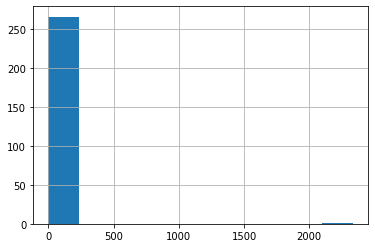

In [27]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count